In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load dataset
df = pd.read_csv("creditcard.csv")

# Display dataset information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41683 entries, 0 to 41682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    41683 non-null  int64  
 1   V1      41683 non-null  float64
 2   V2      41683 non-null  float64
 3   V3      41682 non-null  float64
 4   V4      41682 non-null  float64
 5   V5      41682 non-null  float64
 6   V6      41682 non-null  float64
 7   V7      41682 non-null  float64
 8   V8      41682 non-null  float64
 9   V9      41682 non-null  float64
 10  V10     41682 non-null  float64
 11  V11     41682 non-null  float64
 12  V12     41682 non-null  float64
 13  V13     41682 non-null  float64
 14  V14     41682 non-null  float64
 15  V15     41682 non-null  float64
 16  V16     41682 non-null  float64
 17  V17     41682 non-null  float64
 18  V18     41682 non-null  float64
 19  V19     41682 non-null  float64
 20  V20     41682 non-null  float64
 21  V21     41682 

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41678,40781,-0.447381,1.134089,0.534095,-0.192366,1.344408,-0.370402,1.088646,-0.094025,-0.444502,...,-0.050234,-0.092340,-0.463501,-0.908485,0.202750,-0.506844,-0.058317,-0.085094,1.00,0.0
41679,40782,1.133168,0.406826,0.956032,2.315761,-0.242409,0.225013,-0.295703,0.130832,-0.768433,...,0.180411,0.487918,-0.121882,0.029950,0.465114,0.097369,0.010912,0.018509,10.65,0.0
41680,40783,-0.536190,1.355132,0.064049,0.884589,0.581654,-0.179437,0.466058,0.213312,-0.130088,...,-0.013520,0.198903,-0.112066,-0.505780,-0.266556,-0.349786,-0.367509,-0.399716,1.00,0.0
41681,40783,-0.498757,0.332449,1.917148,-2.340131,-1.098398,-0.863136,-0.055820,-0.084046,1.673677,...,0.371752,1.441352,-0.250882,0.483504,-0.140917,-0.613552,0.380606,0.226502,26.59,0.0
41682,40784,-0.621229,-0.733600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Checking for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64



Class Distribution:
Class
0.0    41574
1.0      108
Name: count, dtype: int64


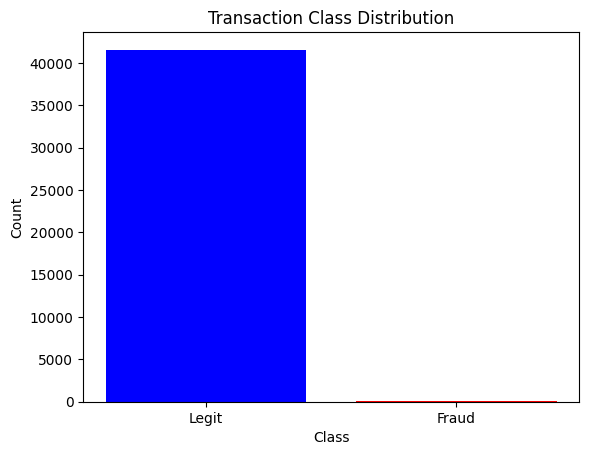

In [ ]:
# Distribution of legit and fraudulent transactions
print("\nClass Distribution:")
print(df['Class'].value_counts())
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts().values, color=['blue', 'red'])
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Separating legit and fraud transactions
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Display statistical measures of data
print("\nStatistical Summary of Legit Transactions:")
print(legit.Amount.describe())
print("\nStatistical Summary of Fraudulent Transactions:")
print(fraud.Amount.describe())


Statistical Summary of Legit Transactions:
count    41574.000000
mean        89.092554
std        237.129967
min          0.000000
25%          7.550000
50%         24.000000
75%         80.000000
max       7879.420000
Name: Amount, dtype: float64

Statistical Summary of Fraudulent Transactions:
count     108.000000
mean       93.512593
std       250.863273
min         0.000000
25%         1.000000
50%         2.320000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64


<ipython-input-8-231524a76eb1>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([legit['Amount'], fraud['Amount']], labels=['Legit', 'Fraud'])


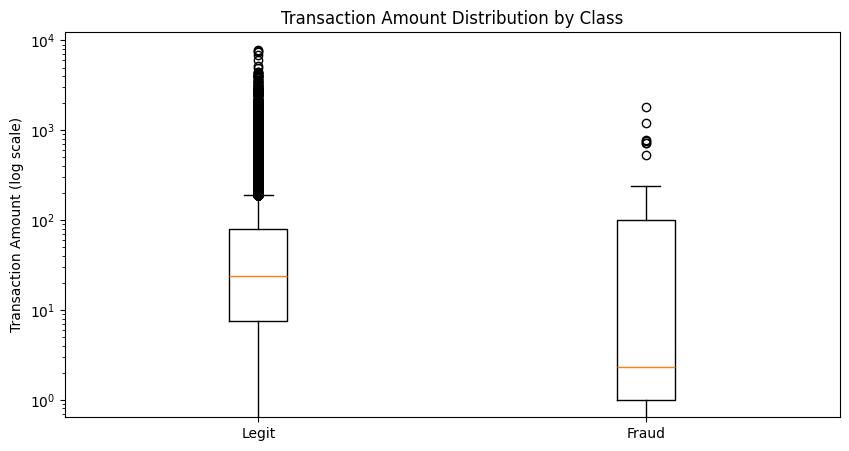

In [ ]:
# Compare Amount values for both transactions
plt.figure(figsize=(10,5))
plt.boxplot([legit['Amount'], fraud['Amount']], labels=['Legit', 'Fraud'])
plt.yscale('log')
plt.title("Transaction Amount Distribution by Class")
plt.ylabel("Transaction Amount (log scale)")
plt.show()

In [ ]:

df = df.sample(n=np.random.randint(9000,10000), random_state=42)

# Handle missing values
df = df.dropna()

# Ensure target column is integer
df['Class'] = df['Class'].astype(int)

In [ ]:
# Splitting features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Ensure X contains only numeric columns
X = X.select_dtypes(include=[np.number])

In [ ]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training - XGBoost
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Model Evaluation
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1804
           1       1.00      0.67      0.80         3

    accuracy                           1.00      1807
   macro avg       1.00      0.83      0.90      1807
weighted avg       1.00      1.00      1.00      1807

XGBoost Confusion Matrix:
 [[1804    0]
 [   1    2]]
XGBoost Accuracy: 0.9994465965688988


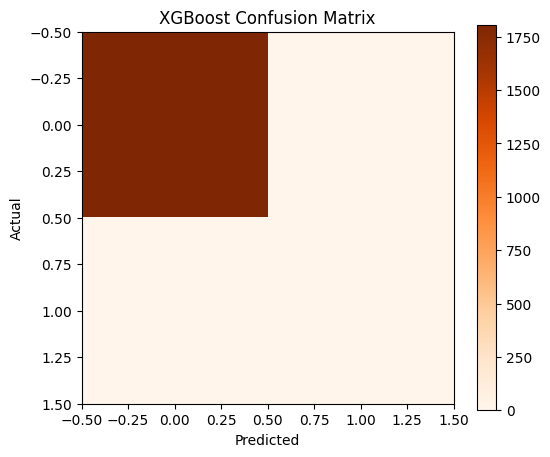

In [ ]:
# Visualizing Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(confusion_matrix(y_test, xgb_pred), cmap='Oranges', interpolation='nearest')
plt.title('XGBoost Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()